In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-v0_8-whitegrid')

In [2]:
data = []
for i in range(9):
    data.append(pd.read_csv(f'../results/population_objectives_{i}.csv'))
data = pd.concat(data)

In [3]:
linestyles = ['dotted', 'dashed', 'solid']
vary_pop_size = ([1, 0, 2], [20, 70, 160], linestyles)
vary_keep_size = ([3, 0, 4], [5, 15, 50], linestyles)
vary_number_mutations = ([5, 0, 6], [1, 6, 15], linestyles)
vary_cooling = ([7, 0, 8], [r"\frac{1}{2}", r"\frac{1}{6}", r"\frac{1}{11}"], linestyles)

In [4]:
def plot_vary_pop_size(ax):
    for scenario, param, lstyle in zip(*vary_pop_size):
        ax.plot(
            data[data['scenario_id'] == scenario][[str(j) for j in range(160)]].T.max() * 1440,
            linestyle=lstyle, c='black',
            label=f'$N = {param}$'
        )
        ax.legend(fontsize=14, frameon=True, loc='lower right')
        ax.set_title(r"$\kappa = 15$, $H = 100$, $m_0=6$, $c = \frac{1}{6}$", fontsize=16)
        ax.set_ylim(181, 184.5)
        ax.set_xlim(0, 100)
        ax.set_xlabel("Iterations", fontsize=14)
        ax.set_ylabel("Value of the best found solution", fontsize=14)

In [5]:
def plot_vary_keep_size(ax):
    for scenario, param, lstyle in zip(*vary_keep_size):
        ax.plot(
            data[data['scenario_id'] == scenario][[str(j) for j in range(160)]].T.max() * 1440,
            linestyle=lstyle, c='black',
            label=f'$\kappa = {param}$'
        )
        ax.legend(fontsize=14, frameon=True, loc='lower right')
        ax.set_title(r"$N = 70$, $H = 100$, $m_0=6$, $c = \frac{1}{6}$", fontsize=16)
        ax.set_ylim(181, 184.5)
        ax.set_xlim(0, 100)
        ax.set_xlabel("Iterations", fontsize=14)
        ax.set_ylabel("Value of the best found solution", fontsize=14)

In [6]:
def plot_vary_mutations(ax):
    for scenario, param, lstyle in zip(*vary_number_mutations):
        ax.plot(
            data[data['scenario_id'] == scenario][[str(j) for j in range(160)]].T.max() * 1440,
            linestyle=lstyle, c='black',
            label=f'$m_0 = {param}$'
        )
        ax.legend(fontsize=14, frameon=True, loc='lower right')
        ax.set_title(r"$N = 70$, $\kappa = 15$, $H = 100$, $c = \frac{1}{6}$", fontsize=16)
        ax.set_ylim(181, 184.5)
        ax.set_xlim(0, 100)
        ax.set_xlabel("Iterations", fontsize=14)
        ax.set_ylabel("Value of the best found solution", fontsize=14)

In [7]:
def plot_vary_cooling(ax):
    for scenario, param, lstyle in zip(*vary_cooling):
        ax.plot(
            data[data['scenario_id'] == scenario][[str(j) for j in range(160)]].T.max() * 1440,
            linestyle=lstyle, c='black',
            label=f'$c = {param}$'
        )
        ax.legend(fontsize=14, frameon=True, loc='lower right')
        ax.set_title(r"$N = 70$, $\kappa = 15$, $H = 100$, $m_0=6$", fontsize=16)
        ax.set_ylim(181, 184.5)
        ax.set_xlim(0, 100)
        ax.set_xlabel("Iterations", fontsize=14)
        ax.set_ylabel("Value of the best found solution", fontsize=14)

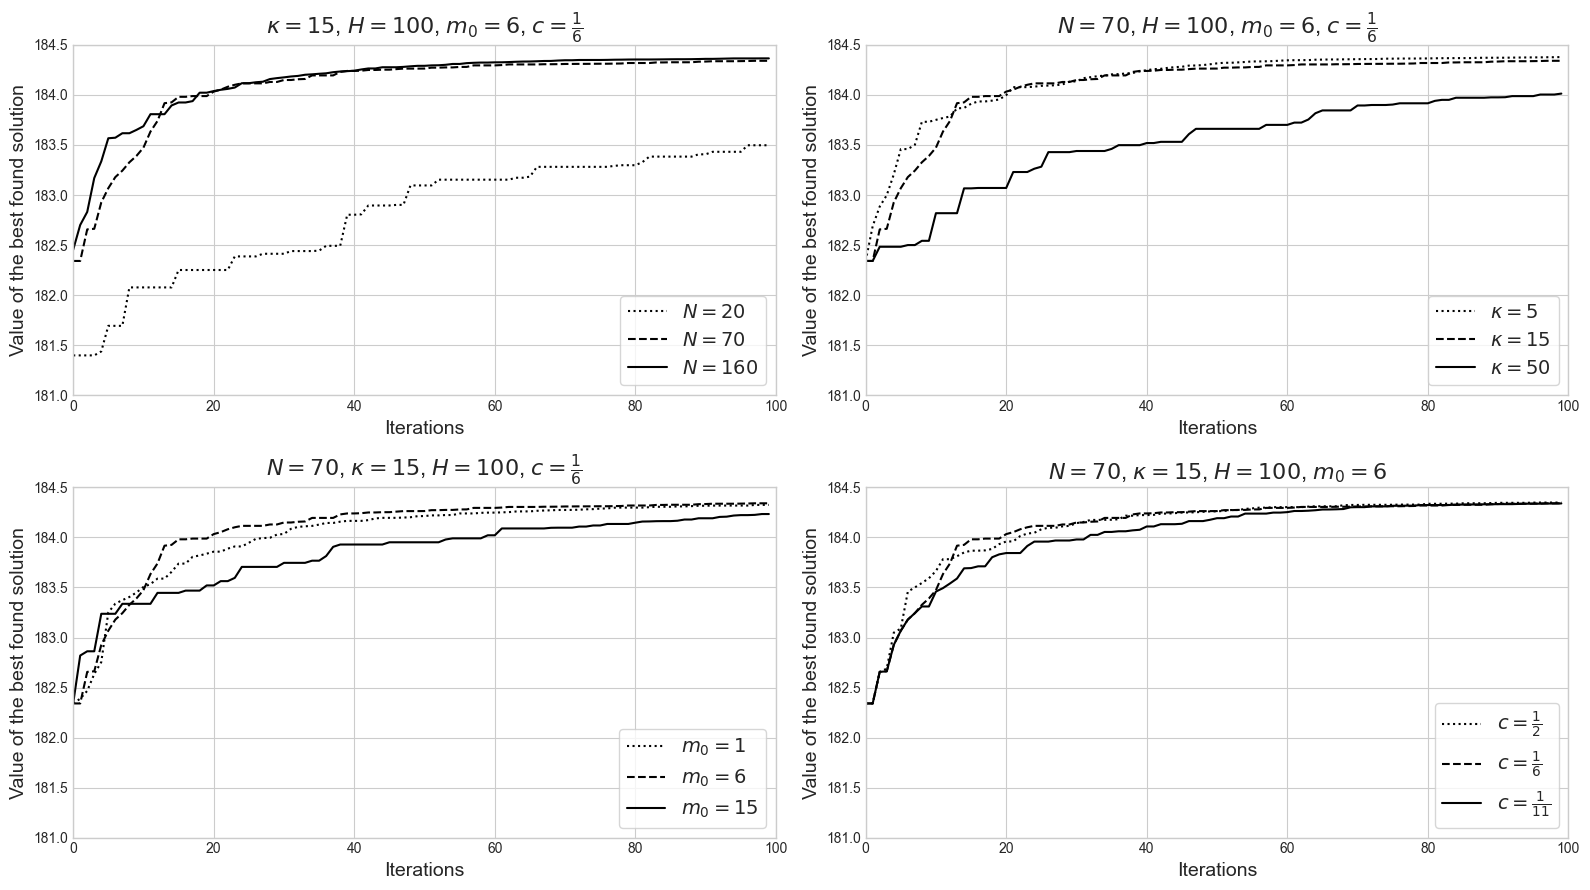

In [8]:
fig, ax = plt.subplots(2, 2, figsize=(16, 9))
plot_vary_pop_size(ax[0, 0])
plot_vary_keep_size(ax[0, 1])
plot_vary_mutations(ax[1, 0])
plot_vary_cooling(ax[1, 1])
plt.tight_layout()
fig.savefig('../tex/img/hyperparameter_exploration.pdf')